In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import xgboost as xgb

In [57]:
from sklearn import tree

In [2]:
df = pd.read_csv("train.csv")

In [43]:
asset_details = pd.read_csv("asset_details.csv")

In [42]:
df.info

<bound method DataFrame.info of            timestamp  Asset_ID  Count          Open          High  \
0         1514764860         2   40.0   2376.580000   2399.500000   
1         1514764860         0    5.0      8.530000      8.530000   
2         1514764860         1  229.0  13835.194000  14013.800000   
3         1514764860         5   32.0      7.659600      7.659600   
4         1514764860         7    5.0     25.920000     25.920000   
...              ...       ...    ...           ...           ...   
24236801  1632182400         9  775.0    157.181571    157.250000   
24236802  1632182400        10   34.0   2437.065067   2438.000000   
24236803  1632182400        13  380.0      0.091390      0.091527   
24236804  1632182400        12  177.0      0.282168      0.282438   
24236805  1632182400        11   48.0    232.695000    232.800000   

                   Low         Close        Volume          VWAP    Target  
0          2357.140000   2374.590000  1.923301e+01   2373.1163

In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
timestamp,24236806.0,1.577120e+09,3.323350e+07,1.514765e+09,1.549011e+09,1.578372e+09,1.606198e+09,1.632182e+09
Asset_ID,24236806.0,6.292544e+00,4.091861e+00,0.000000e+00,3.000000e+00,6.000000e+00,9.000000e+00,1.300000e+01
Count,24236806.0,2.864593e+02,8.673982e+02,1.000000e+00,1.900000e+01,6.400000e+01,2.210000e+02,1.650160e+05
Open,24236806.0,1.432640e+03,6.029605e+03,1.170400e-03,2.676500e-01,1.428860e+01,2.288743e+02,6.480594e+04
High,24236806.0,1.436350e+03,6.039482e+03,1.195000e-03,2.681600e-01,1.431250e+01,2.293000e+02,6.490000e+04
Low,24236806.0,1.429568e+03,6.020261e+03,2.000000e-04,2.669000e-01,1.426300e+01,2.284200e+02,6.467053e+04
Close,24236806.0,1.432640e+03,6.029611e+03,1.171400e-03,2.676483e-01,1.428920e+01,2.288729e+02,6.480854e+04
Volume,24236806.0,2.868530e+05,2.433935e+06,-3.662812e-01,1.410725e+02,1.295415e+03,2.729764e+04,7.597554e+08
VWAP,24236797.0,NaN,NaN,-inf,2.676368e-01,1.428769e+01,2.288728e+02,inf
Target,23486468.0,7.121752e-06,5.679042e-03,-5.093509e-01,-1.694354e-03,-4.289844e-05,1.601520e-03,9.641699e-01


In [ ]:
df.head(5)

In [ ]:
df.tail(5)

In [31]:
df.columns

Index(['timestamp', 'Asset_ID', 'Count', 'Open', 'High', 'Low', 'Close',
       'Volume', 'VWAP', 'Target'],
      dtype='object')

In [32]:
df.index

RangeIndex(start=0, stop=24236806, step=1)

In [ ]:
df.columns

<AxesSubplot:xlabel='Target', ylabel='Open'>

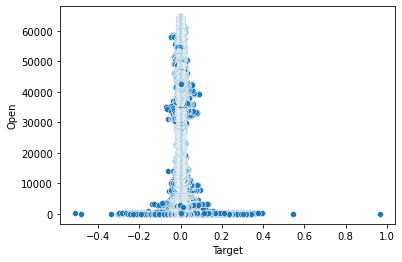

In [10]:
sns.scatterplot(x = "Target", y = "Open", data=df)

<AxesSubplot:xlabel='Target', ylabel='High'>

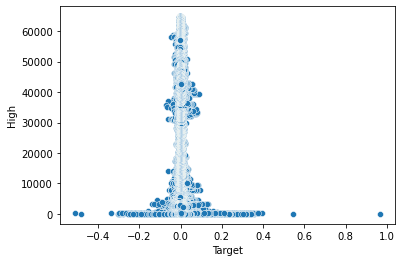

In [11]:
sns.scatterplot(x = "Target", y = "High", data=df)

<AxesSubplot:xlabel='Target', ylabel='Low'>

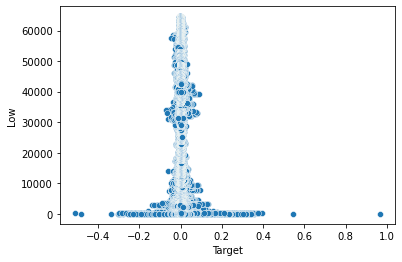

In [12]:
sns.scatterplot(x = "Target", y = "Low", data=df)

<AxesSubplot:xlabel='Target', ylabel='Open'>

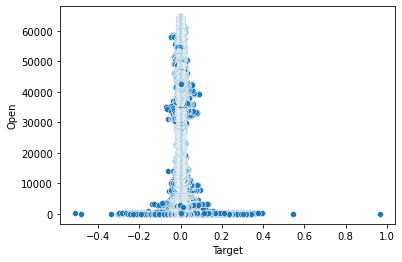

In [9]:
sns.scatterplot(x = "Target", y = "Open", data=df)

<AxesSubplot:xlabel='Target', ylabel='Volume'>

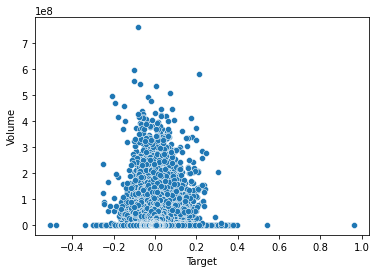

In [8]:
sns.scatterplot(x = "Target", y = "Volume", data=df)

In [5]:
df[["High", "Low", "Count", "Open", "Volume", "VWAP", "Target"]].corr(method="pearson")

,High,Low,Count,Open,Volume,VWAP,Target
High,1.000000,0.999991,0.397802,0.999997,-0.028009,0.999997,-0.001069
Low,0.999991,1.000000,0.397007,0.999997,-0.027966,0.999998,-0.001065
Count,0.397802,0.397007,1.000000,0.397437,0.325419,0.397419,0.005706
Open,0.999997,0.999997,0.397437,1.000000,-0.027983,1.000000,-0.001066
Volume,-0.028009,-0.027966,0.325419,-0.027983,1.000000,-0.027983,0.011992
VWAP,0.999997,0.999998,0.397419,1.000000,-0.027983,1.000000,-0.001066
Target,-0.001069,-0.001065,0.005706,-0.001066,0.011992,-0.001066,1.000000


In [20]:
null_data = df[df.isnull().values.any(axis=1)]

In [22]:
null_data

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
7,1514764860,11,7.0,329.090000,329.880000,329.090000,329.460000,6.635710e+00,329.454118,NaN
44,1514765160,7,76.0,26.425500,27.073000,25.550000,26.400000,1.857937e+03,26.352542,NaN
95,1514765520,11,8.0,327.670000,327.680000,326.770000,326.770000,1.790163e+01,326.990493,NaN
111,1514765640,11,8.0,326.930000,327.960000,326.220000,327.910000,2.684030e+01,326.476237,NaN
116,1514765700,7,12.0,26.441000,27.070000,25.812000,26.399000,1.638301e+02,26.449597,NaN
...,...,...,...,...,...,...,...,...,...,...
24236801,1632182400,9,775.0,157.181571,157.250000,156.700000,156.943857,4.663725e+03,156.994319,NaN
24236802,1632182400,10,34.0,2437.065067,2438.000000,2430.226900,2432.907467,3.975460e+00,2434.818747,NaN
24236803,1632182400,13,380.0,0.091390,0.091527,0.091260,0.091349,2.193732e+06,0.091388,NaN
24236804,1632182400,12,177.0,0.282168,0.282438,0.281842,0.282051,1.828508e+05,0.282134,NaN
